<a href="https://colab.research.google.com/github/taneshkaa/Twitter-Sentiment-Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis**

Twitter Sentiment Analysis is a process of computationally categorizing piece of text (Tweets); In order to determine the writer's attitude towards a particular news, topic, product, etc. is Positive, Neutral or Negative. 

Analysis are done with Natural Language Processing using the nltk library with python.

In [1]:
#Importing Packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#Loading the Dataset
from google.colab import files
uploaded = files.upload()

Saving Sentiment.csv to Sentiment.csv


In [3]:
data = pd.read_csv('Sentiment.csv')

#Only necessary Columns
data = data[['text','sentiment']]

Splitting the Dataset into a Training Set and a Testing Set. The Test Set is the 10% of the Original Dataset.

In [4]:
# Splitting the Dataset into Train Set and Test Set
train, test = train_test_split(data,test_size = 0.1)

# Removing Neutral Sentiments
train = train[train.sentiment != "Neutral"]

Seperation of Positive and Negative Tweets of Training Set in order to Visualize the Contained Words. 

Using WordCloud for Visualization of Positive and Negative Words. 

Positive Words-:


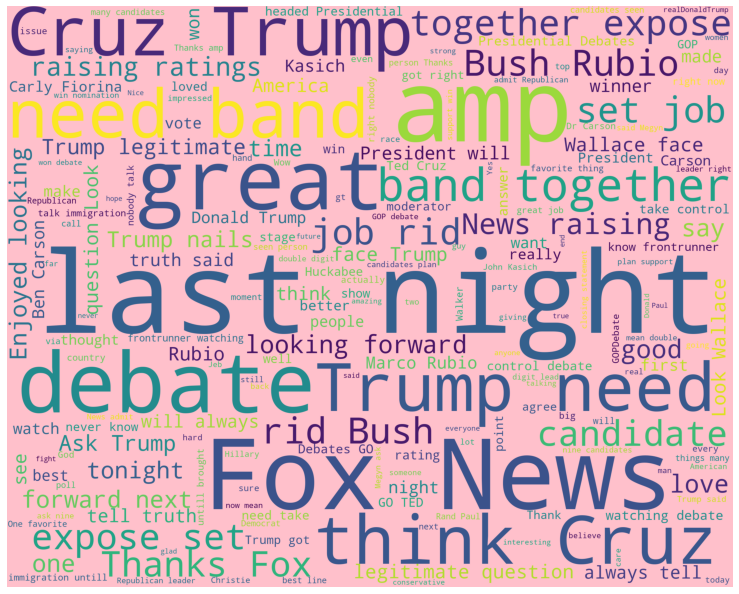



Negative Words-:


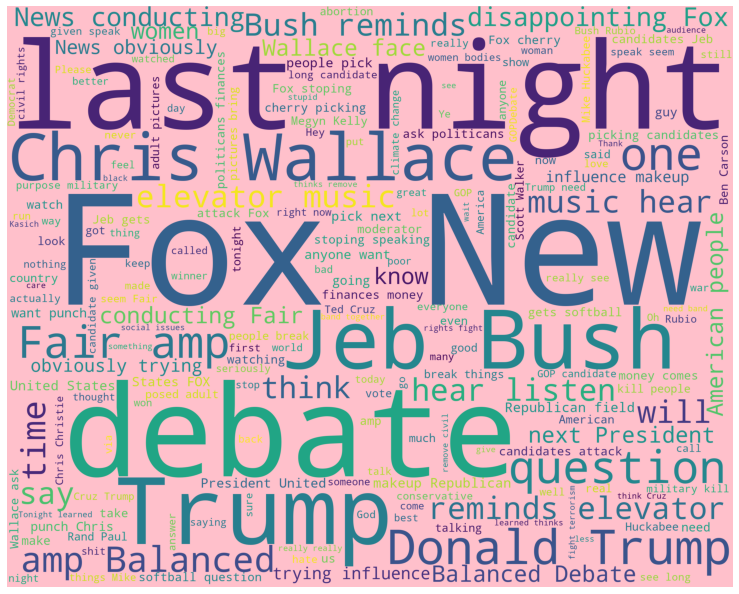

In [8]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive Words-:")
wordcloud_draw(train_pos,'pink')
print("\n")
print("Negative Words-:")
wordcloud_draw(train_neg, 'pink')

### **Positive Words Set -:**
Legitimate, Truth, Strong, Great, Together, etc.

### **Negative Words Set -:** 
Disappointing, Trying, Attacks, Bad, Softball, etc.

In [17]:
import nltk
nltk.download('stopwords')
#from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Removing Stop Words - Words that do not contain any important significance to be used in Search Queries [the, for, this, is, etc.]

In [18]:
tweets = []
stop_words = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stop_words]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [19]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

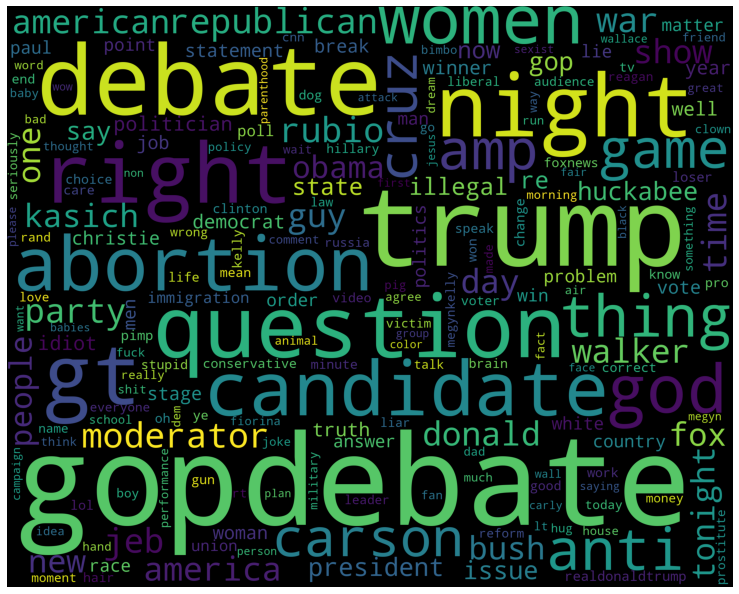

In [20]:
wordcloud_draw(w_features)

In [24]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set) 

In [25]:
#Positive and Negative Word Count
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))  

[Negative]: 851/812 
[Positive]: 213/85 
